## Pre processing of midi data

In [1]:
# from music21 import midi
# mf = midi.MidiFile()
# mf.open(midis[0]) 
# mf.read()
# mf.close()
# s = midi.translate.midiFileToStream(mf)
# s.show('midi')

In [1]:
from music21 import converter, instrument, note, chord
import json
import sys
import numpy as np
from imageio import imwrite
from PIL import Image

def extractNote(element):
    return int(element.pitch.ps)

def extractDuration(element):
    return element.duration.quarterLength

def get_notes(notes_to_parse):

    """ Get all the notes and chords from the midi files in the ./midi_songs directory """
    durations = []
    notes = []
    start = []

    for element in notes_to_parse:
        if isinstance(element, note.Note):
            if element.isRest:
                continue

            start.append(element.offset)
            notes.append(extractNote(element))
            durations.append(extractDuration(element))
                
        elif isinstance(element, chord.Chord):
            if element.isRest:
                continue
            for chord_note in element.notes:
                start.append(element.offset)
                durations.append(extractDuration(element))
                notes.append(extractNote(chord_note))

    return {"start":start, "pitch":notes, "dur":durations}

def midi2image(midi_path,image_path):
    mid = converter.parse(midi_path)

    instruments = instrument.partitionByInstrument(mid)

    data = {}

    try:
        i=0
        for instrument_i in instruments.parts:
            notes_to_parse = instrument_i.recurse()

            if instrument_i.partName is None:
                data["instrument_{}".format(i)] = get_notes(notes_to_parse)
                i+=1
            else:
                data[instrument_i.partName] = get_notes(notes_to_parse)

    except:
        notes_to_parse = mid.flat.notes
        data["instrument_0".format(i)] = get_notes(notes_to_parse)

    resolution = 0.25

    for instrument_name, values in data.items():
        # https://en.wikipedia.org/wiki/Scientific_pitch_notation#Similar_systems
        upperBoundNote = 127
        lowerBoundNote = 21
        maxSongLength = 100

        index = 0
        prev_index = 0
        repetitions = 0
        while repetitions < 1:
            if prev_index >= len(values["pitch"]):
                break

            matrix = np.zeros((upperBoundNote-lowerBoundNote,maxSongLength))

            pitchs = values["pitch"]
            durs = values["dur"]
            starts = values["start"]

            for i in range(prev_index,len(pitchs)):
                pitch = pitchs[i]

                dur = int(durs[i]/resolution)
                start = int(starts[i]/resolution)

                if dur+start - index*maxSongLength < maxSongLength:
                    for j in range(start,start+dur):
                        if j - index*maxSongLength >= 0:
                            matrix[pitch-lowerBoundNote,j - index*maxSongLength] = 255
                else:
                    prev_index = i
                    break
            img_path = image_path + "/" + midi_path.split("/")[-1].replace(".mid",f"_{instrument_name}_{index}.png")
            imwrite(img_path,matrix)
            index += 1
            repetitions+=1
            


Loading albeniz

In [ ]:
import os
import numpy as np
from PIL import Image
#import py_midicsv as pm
path = './classical_data_midi/albeniz/'
#os.chdir(path)
midiz = !ls ./classical_data_midi/albeniz/
#midiz = os.listdir()
midis = []
for midi in midiz:
    midis.append(path+midi)
    
new_dir = './image_data/albeniz'
count = 0
for midi_path in midis:
    try:
        midi2image(midi_path,new_dir)
        count += 1
        print(count)
    except:
        pass

In [4]:
import os
import numpy as np
from PIL import Image
#import py_midicsv as pm
path = './classical_data_midi/bach/'
#os.chdir(path)
midiz = !ls ./classical_data_midi/bach/
#midiz = os.listdir()
midis = []
for midi in midiz:
    midis.append(path+midi)
    
new_dir = './image_data/bach'
count = 0
for midi_path in midis:
    try:
        midi2image(midi_path,new_dir)
        count += 1
        print(count)
    except:
        pass

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


1


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


2


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


3


In [2]:
x=!ls ./classical_data_midi

In [3]:
for file in x: 
    !mkdir ./image_data/$file

mkdir: cannot create directory ‘./image_data/albeniz’: File exists
mkdir: cannot create directory ‘./image_data/bach’: File exists
mkdir: cannot create directory ‘./image_data/balakir’: File exists
mkdir: cannot create directory ‘./image_data/beeth’: File exists
mkdir: cannot create directory ‘./image_data/borodin’: File exists
mkdir: cannot create directory ‘./image_data/brahms’: File exists
mkdir: cannot create directory ‘./image_data/burgm’: File exists
mkdir: cannot create directory ‘./image_data/chopin’: File exists
mkdir: cannot create directory ‘./image_data/debussy’: File exists
mkdir: cannot create directory ‘./image_data/granados’: File exists
mkdir: cannot create directory ‘./image_data/grieg’: File exists
mkdir: cannot create directory ‘./image_data/haydn’: File exists
mkdir: cannot create directory ‘./image_data/liszt’: File exists
mkdir: cannot create directory ‘./image_data/mendelssohn’: File exists
mkdir: cannot create directory ‘./image_data/mozart’: File exists
mkdir:

In [4]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm
#import py_midicsv as pm
for file in tqdm(x):

    path = str('./classical_data_midi/'+file+'/')
    midiz = !ls ./classical_data_midi/$file/
    midis = []
    for midi in midiz:
        midis.append(path+midi)
    new_dir = str('./image_data/'+file)
    count = 0
    for midi_path in tqdm(midis):
        try:
            midi2image(midi_path,new_dir)
            count += 1
        except:
            pass

  0%|          | 0/14 [00:00<?, ?it/s]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

  7%|▋         | 1/14 [00:00<00:04,  3.05it/s]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 14%|█▍        | 2/14 [00:00<00:03,  3.29it/s]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 21%|██▏       | 3/14 [00:06<00:29,  2.68s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 29%|██▊       | 4/14 [00:06<00:17,  1.77s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 36%|███▌      | 5/14 [00:06<00:10,  1.18s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to 


 97%|█████████▋| 28/29 [08:42<00:27, 27.22s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

  0%|          | 0/7 [00:00<?, ?it/s]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 14%|█▍        | 1/7 [00:01<00:06,  1.13s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 29%|██▊       | 2/7 [00:03<00:08,  1.76s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 43%|████▎     | 3/7 [00:06<00:09,  2.32s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 57%|█████▋    | 4/7 [00:08<00:06,  2.31s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to sup


 38%|███▊      | 18/48 [04:54<10:48, 21.60s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 40%|███▉      | 19/48 [05:18<10:47, 22.33s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 42%|████▏     | 20/48 [06:53<20:32, 44.03s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 44%|████▍     | 21/48 [06:56<14:18, 31.79s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 46%|████▌     | 22/48 [06:58<09:51, 22.74s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 48%|████▊     | 23/48 [06:58<06:41, 16.07s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prio


 31%|███▏      | 5/16 [00:23<00:46,  4.25s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 38%|███▊      | 6/16 [00:24<00:29,  3.00s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 44%|████▍     | 7/16 [00:26<00:23,  2.66s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 50%|█████     | 8/16 [00:28<00:20,  2.59s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 56%|█████▋    | 9/16 [00:30<00:16,  2.36s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 62%|██████▎   | 10/16 [00:33<00:15,  2.63s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to 

 75%|███████▌  | 12/16 [12:23<02:08, 32.03s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 81%|████████▏ | 13/16 [13:02<01:42, 34.08s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 88%|████████▊ | 14/16 [13:32<01:05, 32.89s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 94%|█████████▍| 15/16 [14:33<00:41, 41.19s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

  0%|          | 0/15 [00:00<?, ?it/s]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

  7%|▋         | 1/


 62%|██████▎   | 5/8 [00:17<00:09,  3.19s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 75%|███████▌  | 6/8 [00:19<00:05,  2.71s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 88%|████████▊ | 7/8 [00:57<00:14, 14.39s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

  0%|          | 0/29 [00:00<?, ?it/s]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

  3%|▎         | 1/29 [00:26<12:09, 26.06s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

  7%|▋         | 2/29 [00:30<06:02, 13.43s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to su


 58%|█████▊    | 14/24 [00:52<00:07,  1.26it/s]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 62%|██████▎   | 15/24 [01:04<00:37,  4.17s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 67%|██████▋   | 16/24 [01:15<00:51,  6.42s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 71%|███████   | 17/24 [01:24<00:50,  7.28s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 75%|███████▌  | 18/24 [01:26<00:32,  5.42s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.

 79%|███████▉  | 19/24 [01:29<00:23,  4.76s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prio

In [18]:
print(file)
path = str('./classical_data_midi/grieg/')
midiz = !ls ./classical_data_midi/grieg/
midis = []
for midi in midiz:
    midis.append(path+midi)
new_dir = str('./image_data/grieg')
count = 0
for midi_path in midis:
    try:
        midi2image(midi_path,new_dir)
        count += 1
        print(count)
    except:
        pass

tschai


In [39]:
midis

['./classical_data_midi/albeniz/alb_esp1.mid',
 './classical_data_midi/albeniz/alb_esp2.mid',
 './classical_data_midi/albeniz/alb_esp3.mid',
 './classical_data_midi/albeniz/alb_esp4.mid',
 './classical_data_midi/albeniz/alb_esp5.mid',
 './classical_data_midi/albeniz/alb_esp6.mid',
 './classical_data_midi/albeniz/alb_se1.mid',
 './classical_data_midi/albeniz/alb_se2.mid',
 './classical_data_midi/albeniz/alb_se3.mid',
 './classical_data_midi/albeniz/alb_se4.mid',
 './classical_data_midi/albeniz/alb_se5.mid',
 './classical_data_midi/albeniz/alb_se6.mid',
 './classical_data_midi/albeniz/alb_se7.mid',
 './classical_data_midi/albeniz/alb_se8.mid']

In [14]:
!ls ./classical_data_midi/albeniz/

alb_esp1.mid alb_esp4.mid alb_se1.mid  alb_se4.mid  alb_se7.mid
alb_esp2.mid alb_esp5.mid alb_se2.mid  alb_se5.mid  alb_se8.mid
alb_esp3.mid alb_esp6.mid alb_se3.mid  alb_se6.mid


In [17]:
import os
from PIL import Image
from matplotlib import pyplot as plt 
import numpy as np
path = './image_data/albeniz/'
os.getcwd()
img_list = os.listdir(path)



In [18]:
pixels = []
for i in range(len(img_list)):
    if "png" in img_list[i]:
        img = Image.open(path+'/'+img_list[i],'r')
        img = img.resize((106,106), Image.ANTIALIAS)
        pix = np.array(img.getdata())
        if np.mean(img) != 0:    
            pix = pix.astype('float32')
            pix /= 255.0
            pixels.append(pix.reshape(106,106,1))
pixels = np.array(pixels)

In [19]:
with open("numpy_data.npy","wb") as f:
    np.save(f,pixels)

In [20]:
with open("numpy_data.npy","rb") as f:
    a = np.load(f)

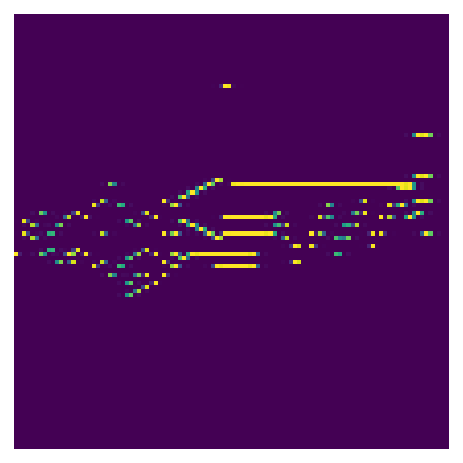

In [22]:
plt.axis('off')
plt.imshow(a[0].reshape([106,106]))

In [41]:
from PIL import Image
import numpy as np
from music21 import instrument, note, chord, stream

lowerBoundNote = 21
def column2notes(column):
    notes = []
    for i in range(len(column)):
        if column[i] > 255/2:
            notes.append(i+lowerBoundNote)
    return notes

resolution = 0.25
def updateNotes(newNotes,prevNotes): 
    res = {} 
    for note in newNotes:
        if note in prevNotes:
            res[note] = prevNotes[note] + resolution
        else:
            res[note] = resolution
    return res

def image2midi(image_path):
    with Image.open(image_path) as image:
        im_arr = np.frombuffer(image.tobytes(), dtype=np.uint8)
        try:
            im_arr = im_arr.reshape((image.size[1], image.size[0]))
        except:
            im_arr = im_arr.reshape((image.size[1], image.size[0],3))
            im_arr = np.dot(im_arr, [0.33, 0.33, 0.33])

    """ convert the output from the prediction to notes and create a midi file
        from the notes """
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model

    prev_notes = updateNotes(im_arr.T[0,:],{})
    for column in im_arr.T[1:,:]:
        notes = column2notes(column)
        # pattern is a chord
        notes_in_chord = notes
        old_notes = prev_notes.keys()
        for old_note in old_notes:
            if not old_note in notes_in_chord:
                new_note = note.Note(old_note,quarterLength=prev_notes[old_note])
                new_note.storedInstrument = instrument.Piano()
                if offset - prev_notes[old_note] >= 0:
                    new_note.offset = offset - prev_notes[old_note]
                    output_notes.append(new_note)
                elif offset == 0:
                    new_note.offset = offset
                    output_notes.append(new_note)                    
                else:
                    print(offset,prev_notes[old_note],old_note)

        prev_notes = updateNotes(notes_in_chord,prev_notes)

        # increase offset each iteration so that notes do not stack
        offset += resolution

    for old_note in prev_notes.keys():
        new_note = note.Note(old_note,quarterLength=prev_notes[old_note])
        new_note.storedInstrument = instrument.Piano()
        new_note.offset = offset - prev_notes[old_note]

        output_notes.append(new_note)

    prev_notes = updateNotes(notes_in_chord,prev_notes)

    midi_stream = stream.Stream(output_notes)

    midi_stream.write('midi', fp=image_path.split("/")[-1].replace(".png",".mid"))

import sys
image_path = './image_data/albeniz/alb_esp1_Piano_0.png'
image2midi(image_path)

In [35]:
sys.argv

['/Users/alhuwasy/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py',
 '-f',
 '/Users/alhuwasy/Library/Jupyter/runtime/kernel-6944f584-0fe5-420b-8b61-697ec05dfeb0.json']